In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from scipy.optimize import curve_fit

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [2]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

# Molteplicità di Stub per GMT

In [3]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [4]:
'''nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))
nGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))
nGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))
nGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))

nGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])

MaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)

nGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306
'''

'nGmtLS133_count = ConvertToHz(np.bincount(nGmtMuons_LS133))\nnGmtLS263_count = ConvertToHz(np.bincount(nGmtMuons_LS263))\nnGmtLS264_count = ConvertToHz(np.bincount(nGmtMuons_LS264))\nnGmtLS306_count = ConvertToHz(np.bincount(nGmtMuons_LS306))\n\nnGmt_Array = ak.Array([nGmtLS133_count, nGmtLS263_count, nGmtLS264_count, nGmtLS306_count])\n\nMaxStubs = max(len(nGmt_Array[0]), len(nGmt_Array[1]), len(nGmt_Array[2]), len(nGmt_Array[3]))\n\n#Filled Array per eseguire una somma vettoriale dei 4 array\nFnGmtLS133 = ak.fill_none(ak.pad_none(nGmt_Array[0], MaxStubs, axis = 0, clip=True), 0)\nFnGmtLS263 = ak.fill_none(ak.pad_none(nGmt_Array[1], MaxStubs, axis = 0, clip=True), 0)\nFnGmtLS264 = ak.fill_none(ak.pad_none(nGmt_Array[2], MaxStubs, axis = 0, clip=True), 0)\nFnGmtLS306 = ak.fill_none(ak.pad_none(nGmt_Array[3], MaxStubs, axis = 0, clip=True), 0)\n\nnGmt = FnGmtLS133 + FnGmtLS263 + FnGmtLS264 + FnGmtLS306\n'

In [5]:
'''fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nGmt[:])), nGmt[:])

#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 6)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')'''

'fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)\n\nset_label_font(ax, FONTSIZE)\nset_tick_font(ax, FONTSIZE - 2)\ndraw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")\n\nax.bar(np.arange(len(nGmt[:])), nGmt[:])\n\n#ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))\nax.tick_params(axis=\'x\', which=\'minor\', length=0)\nax.set_xlabel(\'BX number\')\nax.set_ylabel(\'Stub rate [Hz]\')\nax.set_xlim(-0.8, 6)\nax.grid(visible=True, axis=\'y\')\nax.set_yscale(\'log\')'

# $\Delta R$



In [6]:
#Carico dati per GMT
GmtPhi_LS133 = np.array(ak.flatten(gmt_awk_LS133.gmtPhi))
GmtPhi_LS263 = np.array(ak.flatten(gmt_awk_LS263.gmtPhi))
GmtPhi_LS264 = np.array(ak.flatten(gmt_awk_LS264.gmtPhi))
GmtPhi_LS306 = np.array(ak.flatten(gmt_awk_LS306.gmtPhi))

GmtEta_LS133 = np.array(ak.flatten(gmt_awk_LS133.gmtEta))
GmtEta_LS263 = np.array(ak.flatten(gmt_awk_LS263.gmtEta))
GmtEta_LS264 = np.array(ak.flatten(gmt_awk_LS264.gmtEta))
GmtEta_LS306 = np.array(ak.flatten(gmt_awk_LS306.gmtEta))

#Carico dati per BMTF

BmtfEta_LS133 = np.array(ak.flatten(bmtf_awk_LS133.bmtfEta))
BmtfEta_LS263 = np.array(ak.flatten(bmtf_awk_LS263.bmtfEta))
BmtfEta_LS264 = np.array(ak.flatten(bmtf_awk_LS264.bmtfEta))
BmtfEta_LS306 = np.array(ak.flatten(bmtf_awk_LS306.bmtfEta))

BmtfPhi_LS133 = np.array(ak.flatten(bmtf_awk_LS133.bmtfPhi))
BmtfPhi_LS263 = np.array(ak.flatten(bmtf_awk_LS263.bmtfPhi))
BmtfPhi_LS264 = np.array(ak.flatten(bmtf_awk_LS264.bmtfPhi))
BmtfPhi_LS306 = np.array(ak.flatten(bmtf_awk_LS306.bmtfPhi))


Provo ad usare il primo metodo di confronto di un candidato muone verso tutti gli altri muoni del GMT

In [46]:
def Deltar(BmtfPhi, GmtPhi, BmtfEta, GmtEta):
  return np.sqrt((BmtfPhi - GmtPhi)**2 + (BmtfEta - GmtEta)**2)

@njit(parallel = True)
def DeltaRArray(BmtfPhi, GmtPhi, BmtfEta, GmtEta):

  a = 100000
  DeltaR = np.zeros(a)
  DeltaPhi = np.zeros(a)
  DeltaEta = np.zeros(a)

  for i in range(a):

    DeltaRt = np.sqrt((BmtfPhi[i] - GmtPhi[:])**2 + (BmtfEta[i] - GmtEta[:])**2)
    minDeltaR = np.min(DeltaRt)
    ArgMin = np.argmin(DeltaRt)

    DeltaPhi[i] = BmtfPhi[i] - GmtPhi[ArgMin]
    DeltaEta[i] = BmtfEta[i] - GmtEta[ArgMin]

    DeltaR[i] = minDeltaR

  return DeltaR, DeltaPhi, DeltaEta


In [47]:
#DeltaR_LS133, DeltaPhi_LS133, DeltaEta_LS133 = DeltaRArray(BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133)


'''DeltaR_LS263 = DeltaRArray(BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263))
DeltaR_LS264 = DeltaRArray(BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264)
DeltaR_LS306 = DeltaRArray(BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306)'''

'DeltaR_LS263 = DeltaRArray(BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263))\nDeltaR_LS264 = DeltaRArray(BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264)\nDeltaR_LS306 = DeltaRArray(BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306)'

In [60]:
test = np.array(DeltaR_LS133)

<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:25: SyntaxWarning: invalid escape sequence '\e'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_25793/4293267552.py:25: SyntaxWarning: invalid escape sequence '\e'
  '''ax.set_xlabel(r'$\eta$')


"ax.set_xlabel(r'$\\eta$')\nax.set_ylabel(r'$\\phi$')\n\nax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)"

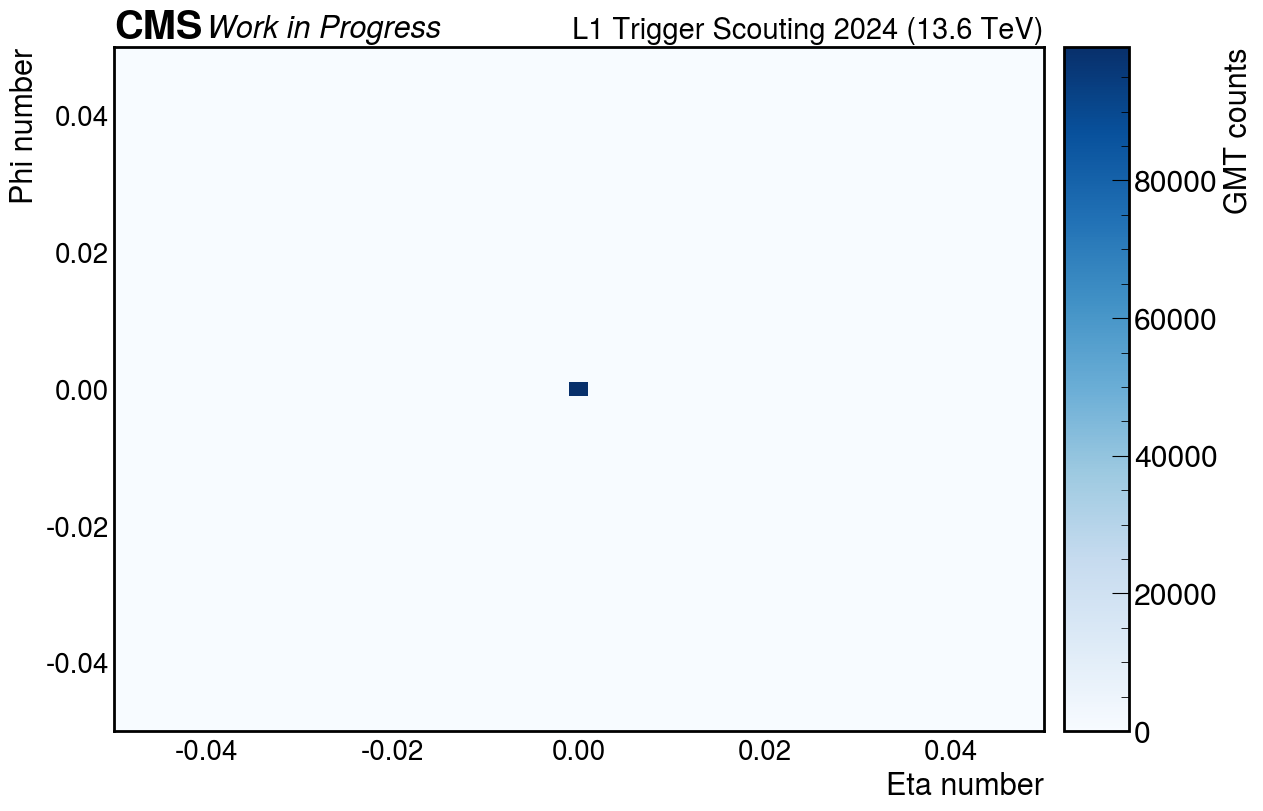

In [49]:
BinPhiR = 50
BinEtaR = 50

a = 0.05
PhiRange, PhiIndicies = Bins(-a, a, BinPhiR, 1)
EtaRange, EtaIndicies = Bins(-a, a, BinEtaR, 1)

hist2d = hist.Hist(
    hist.axis.Variable(EtaRange, name='Eta', label='Eta number'),
    hist.axis.Variable(PhiRange, name='Phi', label='Phi number'),
)
hist2d.fill(Phi=DeltaPhi_LS133, Eta=DeltaEta_LS133)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

'''ax.set_xlabel(r'$\eta$')
ax.set_ylabel(r'$\phi$')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)'''

Numba standard [0.24887157 0.00073731]
Parallelizzato [5.96709219e-01 2.13954802e-04]


Text(0, 1, 'Tempo (s)')

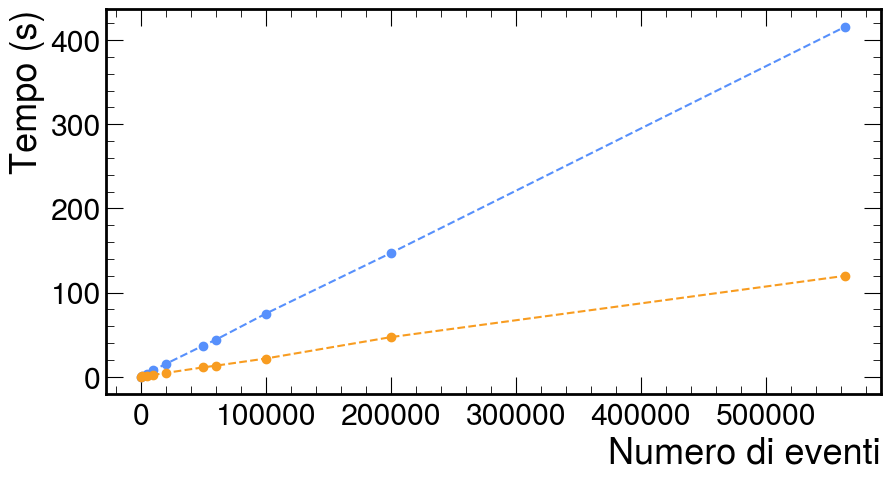

In [11]:
#Vediamo come scala la complessità (usando solo numba)

def Lin(x, a, b):
  return a + b*x

n = [100, 1000, 5000, 10000, 20000, 50000, 60000, 100000, 200000, len(BmtfPhi_LS133)]
Time_Numba = [210e-3, 840e-3, 3.89, 7.7, 15.3, 37.1, 44, 75, 147, 416]
Time_Parallel = [268e-3, 466e-3, 1.3, 2.2, 4.59, 11.2, 13.2, 21.7, 47.1, 120]


Popt_Numba, Pcov_Numba = curve_fit(Lin, n, Time_Numba)
Popt_Parallel, Pcov_Parallel = curve_fit(Lin, n, Time_Parallel)
print("Numba standard", Popt_Numba)
print("Parallelizzato", Popt_Parallel)

plt.figure(figsize=(10, 5))
plt.plot(n, Time_Numba, '--o')
plt.plot(n, Time_Parallel, '--o')
plt.xlabel("Numero di eventi")
plt.ylabel("Tempo (s)")
#plt.xscale('log')


Provo ad usare il secondo metodo nel CERNSummerSchoolReport

In [12]:
indexGMT = []

for i in range(100):
  if (nGmtMuons_LS263[i] > 0):
    indexGMT.append(i)


print(len(indexGMT))
print(indexGMT)



#for i in range(len(indexGMT)):
i = 12
print(BmtfEta_LS263[i], "\t", GmtEta_LS263[i])


18
[3, 6, 10, 12, 23, 27, 41, 42, 45, 55, 56, 57, 61, 69, 79, 90, 94, 99]
0.065249994 	 0.696


## Phi ed Eta GMT

In [51]:
#-----------------------------------------------GMT-----------------------------------------------
GmtQualLS133 = ak.flatten(gmt_awk_LS133.gmtQual)
GmtQualLS263 = ak.flatten(gmt_awk_LS263.gmtQual)
GmtQualLS264 = ak.flatten(gmt_awk_LS264.gmtQual)
GmtQualLS306 = ak.flatten(gmt_awk_LS306.gmtQual)

GmtEtaLS133 = ak.flatten(gmt_awk_LS133.gmtEta)
GmtEtaLS263 = ak.flatten(gmt_awk_LS263.gmtEta)
GmtEtaLS264 = ak.flatten(gmt_awk_LS264.gmtEta)
GmtEtaLS306 = ak.flatten(gmt_awk_LS306.gmtEta)

GmtPhiLS133 = ak.flatten(gmt_awk_LS133.gmtPhi)
GmtPhiLS263 = ak.flatten(gmt_awk_LS263.gmtPhi)
GmtPhiLS264 = ak.flatten(gmt_awk_LS264.gmtPhi)
GmtPhiLS306 = ak.flatten(gmt_awk_LS306.gmtPhi)

GmtQual = ak.concatenate([GmtQualLS133, GmtQualLS263, GmtQualLS264, GmtQualLS306])
GmtPhi = ak.concatenate([GmtPhiLS133, GmtPhiLS263, GmtPhiLS264, GmtPhiLS306])
GmtEta = np.array(ak.concatenate([GmtEtaLS133, GmtEtaLS263, GmtEtaLS264, GmtEtaLS306]))

#-----------------------------------------------BMTF-----------------------------------------------

BmtfHwQualLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwQual)
BmtfHwQualLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwQual)
BmtfHwQualLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwQual)
BmtfHwQualLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwQual)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

BmtfPhiLS133 = ak.flatten(bmtf_awk_LS133.bmtfPhi)
BmtfPhiLS263 = ak.flatten(bmtf_awk_LS263.bmtfPhi)
BmtfPhiLS264 = ak.flatten(bmtf_awk_LS264.bmtfPhi)
BmtfPhiLS306 = ak.flatten(bmtf_awk_LS306.bmtfPhi)

BmtfPhi = ak.concatenate([BmtfPhiLS133, BmtfPhiLS263, BmtfPhiLS264, BmtfPhiLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])
BmtfWeights = np.array(ak.concatenate([BmtfHwQualLS133, BmtfHwQualLS263, BmtfHwQualLS264, BmtfHwQualLS306]))

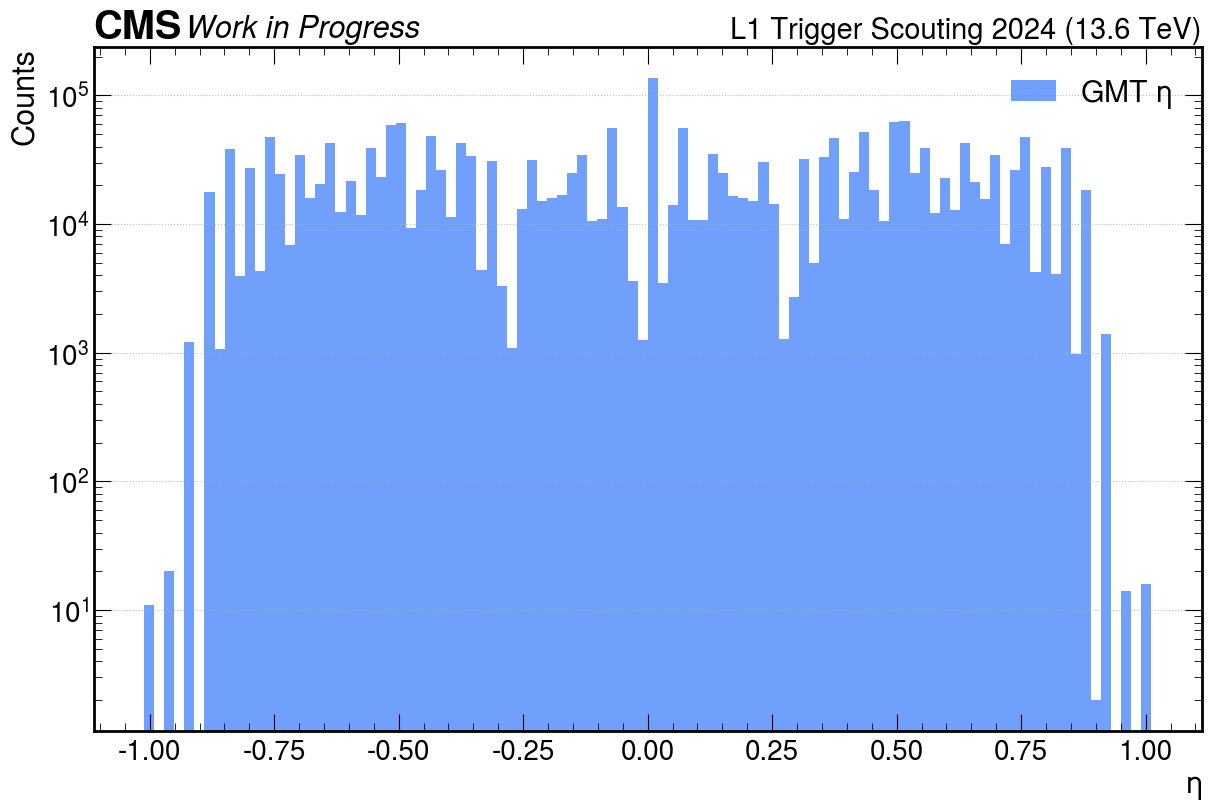

In [52]:
#Plot Eta 
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(GmtEta, bins = 100, alpha = 0.85, label=r'GMT $\eta$')
#ax.hist(BmtfEta, bins = 100, alpha = 0.85, label='BMTF $\eta$')

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Counts')
ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.show()

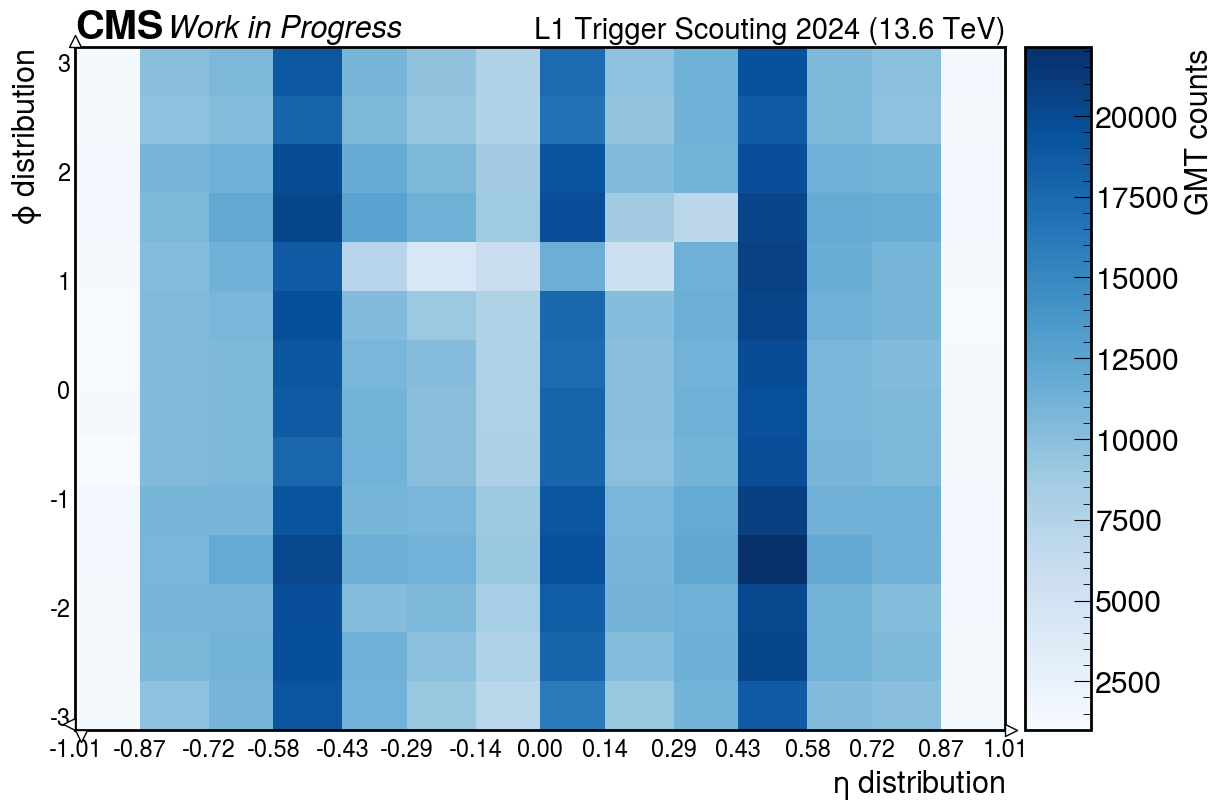

In [53]:
#Grafico bidimensionale per i GMT

BinPhi = 15
BinEta = 15


PhiRange, PhiIndicies = Bins(ak.min(BmtfPhi), ak.max(BmtfPhi), BinPhi, BmtfPhi)
EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
    hist.axis.Variable(np.round(PhiRange, 2), name='Phi', label='Phi number'),
)
hist2d.fill(Phi=GmtPhi, Eta=GmtEta)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label('GMT counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\eta$ distribution')
ax.set_ylabel(r'$\phi$ distribution')

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)